# Clustering Methods and Graphical Models

HW : Implement k-mean to do classification on MNIST dataset.

In [1]:
import pandas as pd
import random
from scipy.spatial.distance import cdist
import numpy as np
from scipy import mean
from sklearn.metrics import accuracy_score
from sklearn import metrics
from tqdm import tqdm

In [2]:
import matplotlib.pyplot as plt

In [3]:
data= pd.read_csv('train.csv')
data = np.array(data[data.columns[1:]])

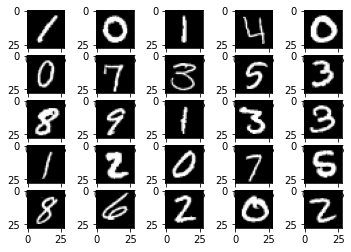

In [4]:
fig = plt.figure()

for i in range(25):
    fig.add_subplot(5, 5, i+1)
    pixels = data[i].reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
plt.show()


In [5]:
train = pd.read_csv('train.csv') # co2 data

train.head()

train_y = train['label']
train_x = train[train.columns[1:]]

# remove the column where all variables are zero
for x in train_x:
    if (train_x[x]==0).all():
        train_x = train_x.drop([x],axis=1)

In [6]:
train_x

,pixel12,pixel13,pixel14,pixel15,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,...,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
k = len(set(train_y))
n = len(train_x)
print("The number of clusters is", k)
print("The number of samples is",n)


The number of clusters is 10
The number of samples is 42000


# Train

### Kmeans with PCA

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=100)

In [10]:
pca_train_x = pca.fit_transform(train_x)
print(pca.explained_variance_ratio_)

[0.09748938 0.07160266 0.06145903 0.05379302 0.04894262 0.04303214
 0.03277051 0.02892103 0.02766902 0.02348871 0.02099325 0.02059001
 0.01702553 0.01692787 0.01581126 0.0148324  0.01319688 0.01282727
 0.01187976 0.01152755 0.01072191 0.01015199 0.00964902 0.00912846
 0.00887641 0.00838766 0.00811856 0.00777406 0.00740635 0.00686661
 0.00657982 0.00638799 0.00599367 0.00588913 0.00564335 0.00540967
 0.00509222 0.00487505 0.00475569 0.00466545 0.00452952 0.00444989
 0.00418255 0.00397505 0.00384542 0.00374919 0.00361013 0.00348522
 0.00336487 0.00320737 0.00315465 0.00309145 0.00293706 0.0028654
 0.00280755 0.00269616 0.0026583  0.00256286 0.00253809 0.00246167
 0.00239703 0.00238734 0.00227567 0.00221492 0.00213905 0.0020611
 0.00202839 0.00195909 0.00193605 0.00188447 0.00186706 0.00181553
 0.00176831 0.0017245  0.00165657 0.00163125 0.00160399 0.0015426
 0.00146465 0.00142074 0.00140758 0.00139745 0.00138085 0.00134891
 0.00131984 0.00129673 0.00129007 0.00123952 0.00121068 0.0011845

### Iteration =1000

In [11]:
Iteration = 1000

centers = np.array([[pca_train_x[random.randrange(n)]] for i in range(10)])

for i in tqdm(range(Iteration)):
    
    distance = np.zeros((n,10))
    
    for j,center in enumerate(centers):
        distance_center = cdist(pca_train_x,center.reshape(-1,1).T,'euclidean')
        distance[:,[j]] = distance_center
        
    clustering = np.array([np.argmin(j) for j in distance]) 
    
    centers = np.array([np.mean(pca_train_x[[idk for idk in np.where(clustering==k_cluster)[0]]],axis=0) for k_cluster in range(k)])

100%|██████████| 1000/1000 [01:58<00:00,  8.42it/s]


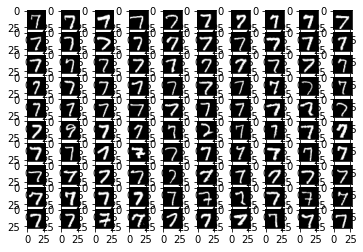

In [12]:
fig = plt.figure()

for i in range(100):
    fig.add_subplot(10, 10, i+1)
    pixels = data[np.where(clustering==1)[0][i*5]].reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
plt.show()

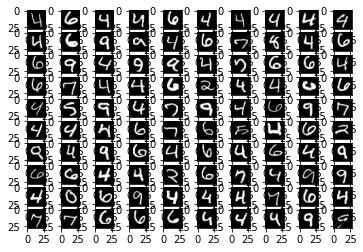

In [13]:
fig = plt.figure()

for i in range(100):
    fig.add_subplot(10, 10, i+1)
    pixels = data[np.where(clustering==0)[0][i*5]].reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
plt.show()

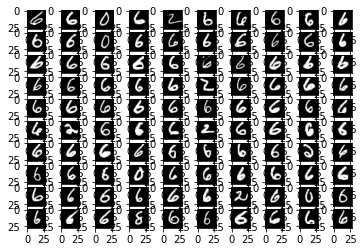

In [14]:
fig = plt.figure()

for i in range(100):
    fig.add_subplot(10, 10, i+1)
    pixels = data[np.where(clustering==7)[0][i*5]].reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
plt.show()

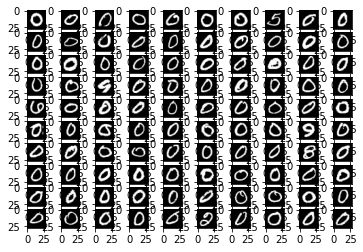

In [15]:
fig = plt.figure()

for i in range(100):
    fig.add_subplot(10, 10, i+1)
    pixels = data[np.where(clustering==8)[0][i*5]].reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
plt.show()

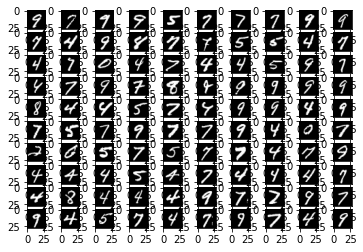

In [16]:
fig = plt.figure()

for i in range(100):
    fig.add_subplot(10, 10, i+1)
    pixels = data[np.where(clustering==6)[0][i*5]].reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
plt.show()

### Iteration =3000

In [17]:
Iteration = 3000

centers_pca_3000 = np.array([[pca_train_x[random.randrange(n)]] for i in range(10)])

for i in tqdm(range(Iteration)):
    
    distance = np.zeros((n,10))
    
    for j,center in enumerate(centers_pca_3000):
        distance_center = cdist(pca_train_x,center.reshape(-1,1).T,'euclidean')
        distance[:,[j]] = distance_center
        
    clustering_pca_3000 = np.array([np.argmin(j) for j in distance]) 
    
    centers_pca_3000 = np.array([np.mean(pca_train_x[[idk for idk in np.where(clustering==k_cluster)[0]]],axis=0) for k_cluster in range(k)])

100%|██████████| 3000/3000 [05:57<00:00,  8.40it/s]


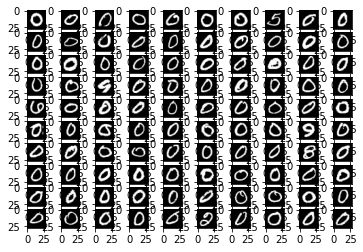

In [18]:
fig = plt.figure()

for i in range(100):
    fig.add_subplot(10, 10, i+1)
    pixels = data[np.where(clustering_pca_3000==8)[0][i*5]].reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
plt.show()

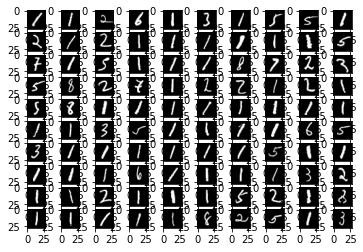

In [19]:
fig = plt.figure()
for i in range(100):
    fig.add_subplot(10, 10, i+1)
    pixels = data[np.where(clustering_pca_3000==5)[0][i*5]].reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
plt.show()

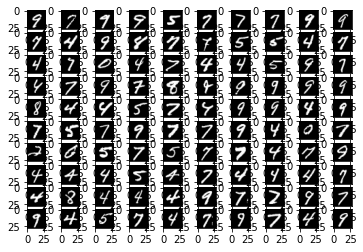

In [20]:
fig = plt.figure()
for i in range(100):
    fig.add_subplot(10, 10, i+1)
    pixels = data[np.where(clustering_pca_3000==6)[0][i*5]].reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
plt.show()

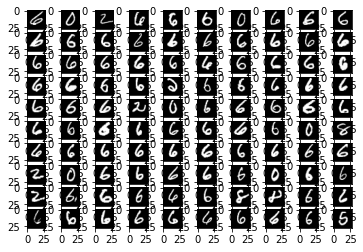

In [21]:
fig = plt.figure()
for i in range(100):
    fig.add_subplot(10, 10, i+1)
    pixels = data[np.where(clustering_pca_3000==7)[0][i*10]].reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
plt.show()

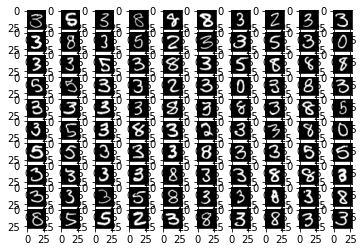

In [22]:
fig = plt.figure()
for i in range(100):
    fig.add_subplot(10, 10, i+1)
    pixels = data[np.where(clustering_pca_3000==2)[0][i*5]].reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
plt.show()

#### Kmeans w/o PCA

It tooks about 40 m

In [23]:
from tqdm import tqdm

In [24]:
train = np.array(train_x)

In [ ]:
Iteration = 1000

raw_centers = np.array([list(train_x.loc[random.randrange(n)]) for i in range(10)])

for i in tqdm(range(Iteration)):
    
    distance = np.zeros((n,10))
    
    for j,center in enumerate(raw_centers):
        distance_center = cdist(train,center.reshape(-1,1).T,'euclidean')
        distance[:,[j]] = distance_center
        
    clustering_raw = np.array([np.argmin(j) for j in distance]) 
    
    raw_centers = np.array([np.mean(train[[idk for idk in np.where(clustering==k_cluster)[0]]],axis=0) for k_cluster in range(k)])
    

  8%|▊         | 83/1000 [03:09<35:09,  2.30s/it]

In [ ]:
fig = plt.figure()

for i in range(100):
    fig.add_subplot(10, 10, i+1)
    pixels = data[np.where(clustering==0)[0][i*5]].reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
plt.show()



In [ ]:
fig = plt.figure()

for i in range(100):
    fig.add_subplot(10, 10, i+1)
    pixels = data[np.where(clustering==1)[0][i]].reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
plt.show()




In [ ]:
fig = plt.figure()

for i in range(100):
    fig.add_subplot(10, 10, i+1)
    pixels = data[np.where(clustering==2)[0][i]].reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
plt.show()





In [ ]:
fig = plt.figure()

for i in range(100):
    fig.add_subplot(10, 10, i+1)
    pixels = data[np.where(clustering==3)[0][i]].reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
plt.show()


In [ ]:
fig = plt.figure()

for i in range(100):
    fig.add_subplot(10, 10, i+1)
    pixels = data[np.where(clustering==4)[0][i]].reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
plt.show()



# Score Clustering using Clusim

* https://github.com/Hoosier-Clusters/clusim
* https://hoosier-clusters.github.io/clusim/html/clusim.html

In [327]:
!pip install clusim

     |████████████████████████████████| 2.0 MB 1.7 MB/s eta 0:00:01


In [79]:
from clusim.clustering import Clustering, print_clustering
import clusim.sim as sim

In [70]:
train_y[np.where(train_y == i)[0]]

array([   11,    27,    28, ..., 41975, 41992, 41999])

In [71]:
true_value = {}
for i in set(train_y):
    true_value[i] = list(np.where(train_y == i)[0])

In [75]:
clustering_value = {}
for i in set(clustering):
    clustering_value[i] = list(np.where(clustering== i)[0])

In [77]:
clustering_pca_value = {}
for i in set(clustering_pca_3000):
    clustering_pca_value[i] = list(np.where(clustering_pca_3000== i)[0])

In [80]:
c_true = Clustering(true_value)
c_pca = Clustering(clustering_value)
c_pca_1000 = Clustering(clustering_pca_value)

In [81]:
sim.element_sim(c_true, c_pca, alpha = 0.9)

1.0

In [82]:
sim.element_sim(c_true, c_pca_1000, alpha = 0.9)

1.0